In [14]:
## imports

import numpy as np
import numpy.ma as ma
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### palette
import matplotlib.cm as mplcm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic



In [15]:
import matplotlib
print(matplotlib.__version__)

2.0.2


In [16]:
## Dataset

dir="/Users/auraoupa/Data/GLORYS2V4/2017/"


In [17]:
def plot_atl(fig,sub,var,lon,lat,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-85, 15, 25, 60])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax,alpha=1)
        ax.add_feature(cfeature.LAND)
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)


In [18]:
def plot_var(month):
    mm=str(month).zfill(2)
    file_var=dir+'/fine_scale_vorticity_variance_boxaverage_natl_y2017m'+str(mm)+'.nc'
    ds=xr.open_dataset(file_var)
    latcrsm=ds['latcrsm']
    loncrsm=ds['loncrsm']
    var=ds['vort_var_boxcar']
    fig = plt.figure(figsize=(20,10))
    plot_atl(fig,111,var,loncrsm, latcrsm,0,0.1,'','GLORYS2V4 Small scales relative vorticity variance in y2017m'+str(mm),seq_cmap)
    plt.savefig('plots/GLORYS2V4_plots_small_scale_vorticity_variance_y2017m'+str(mm)+'.png', dpi=300, bbox_inches='tight')

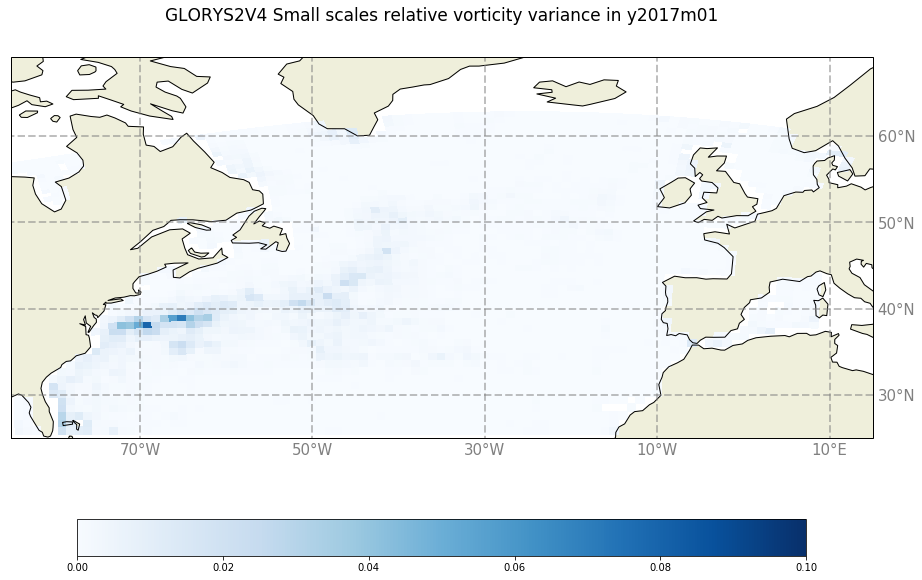

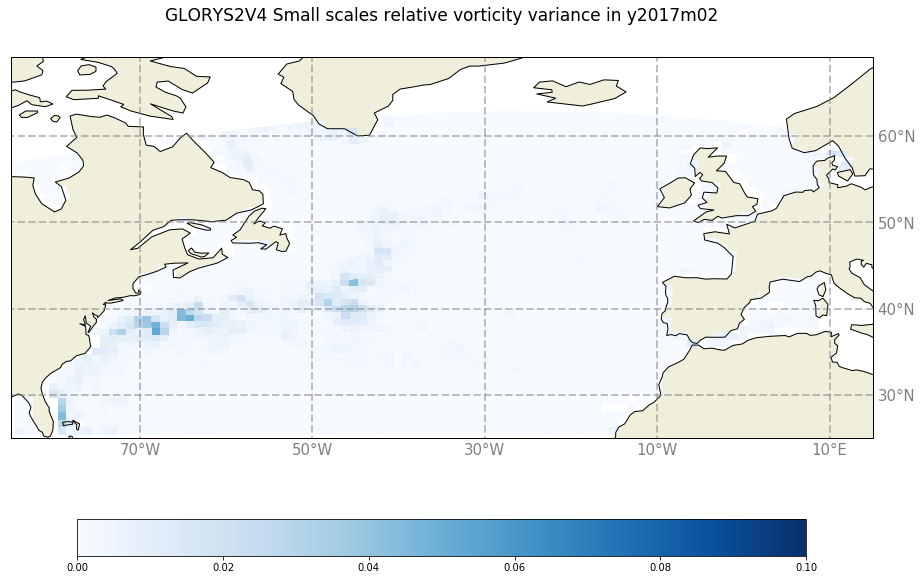

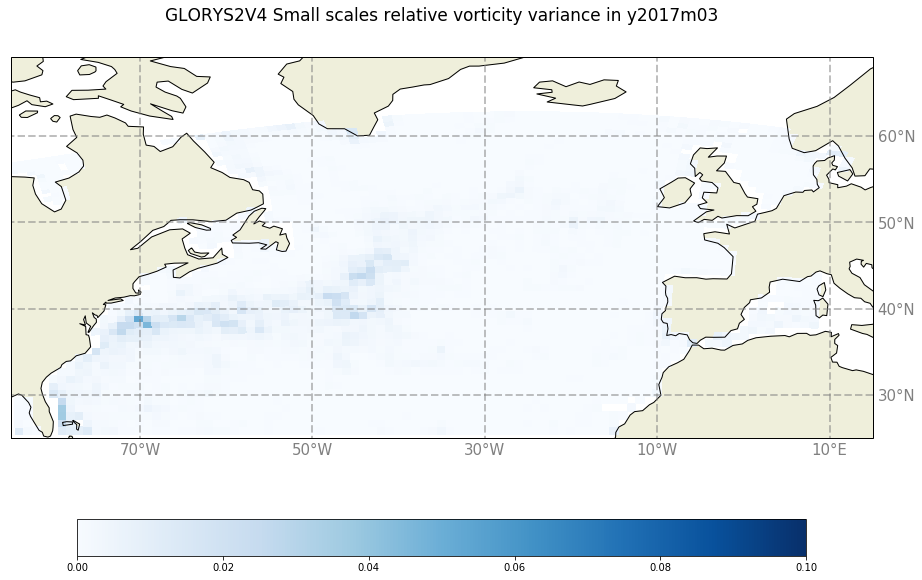

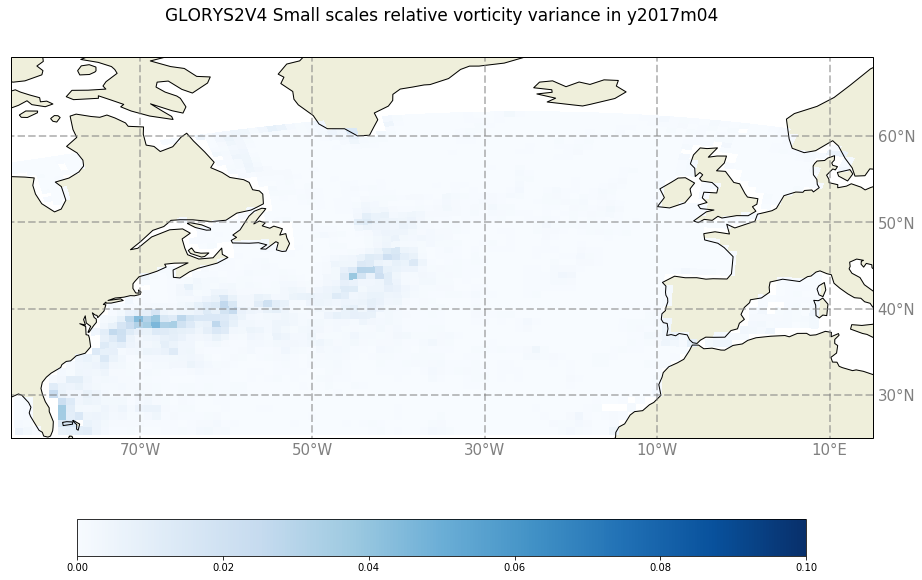

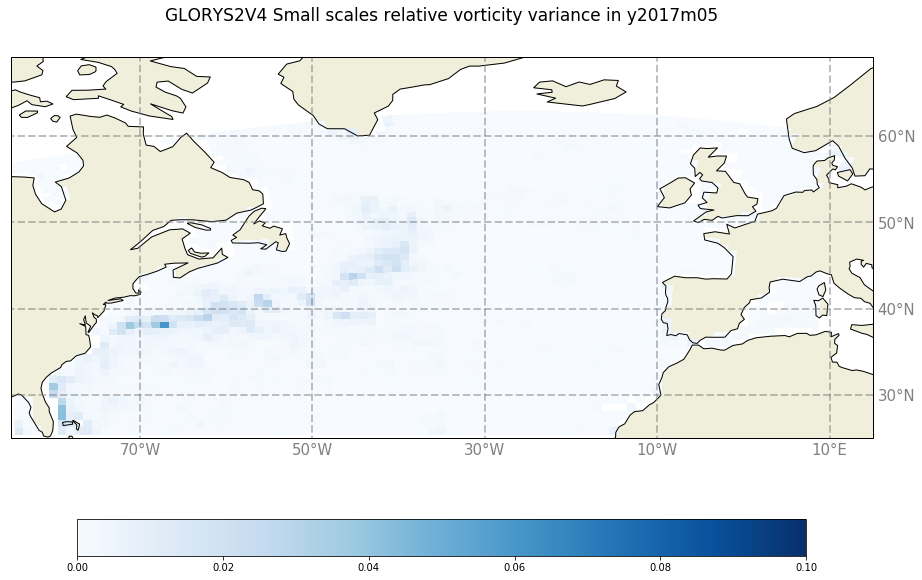

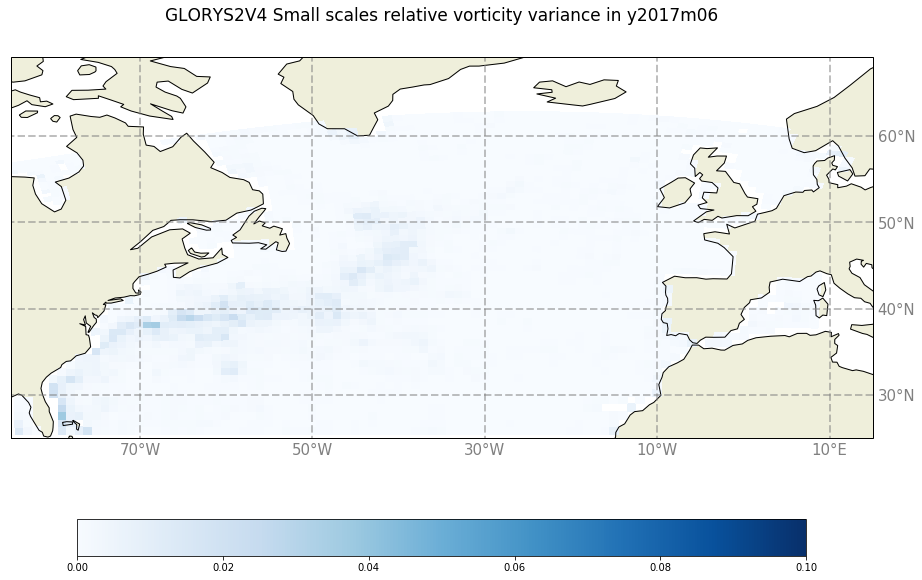

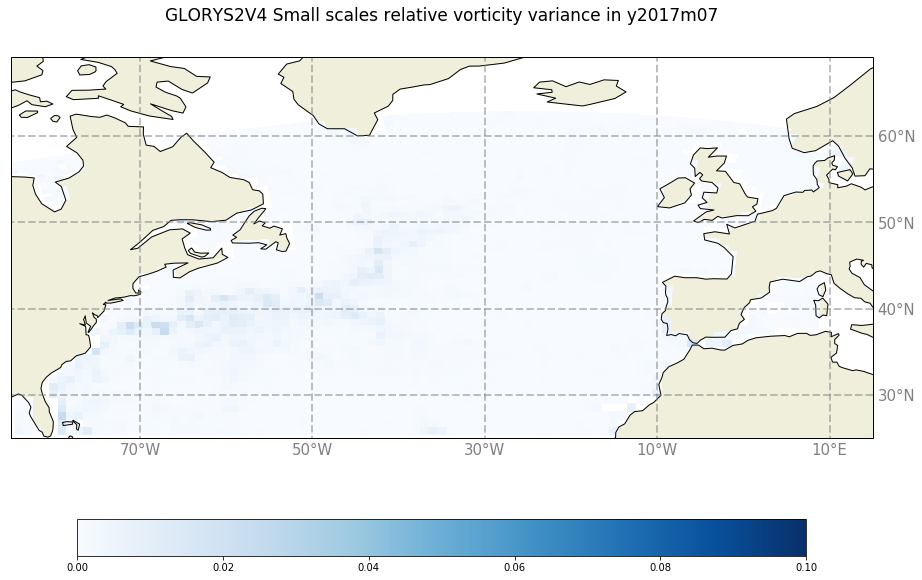

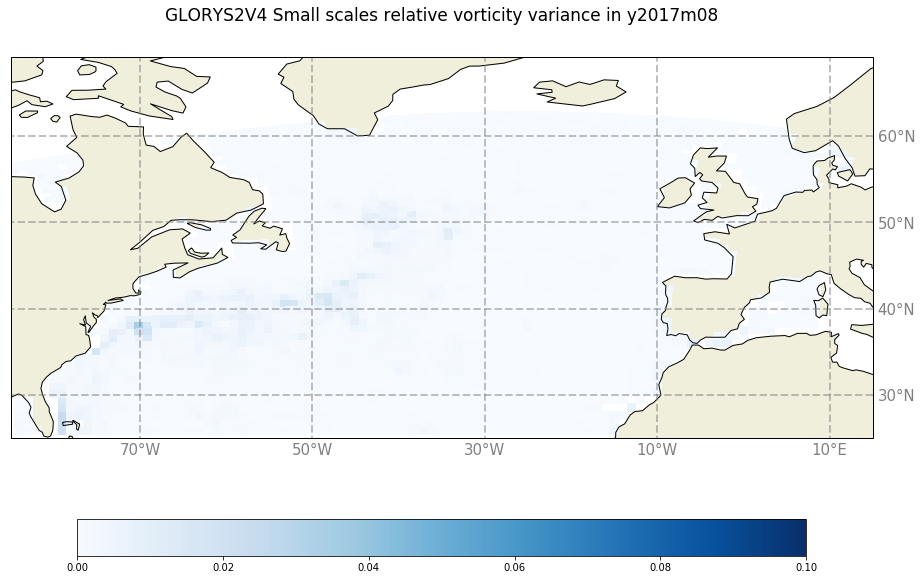

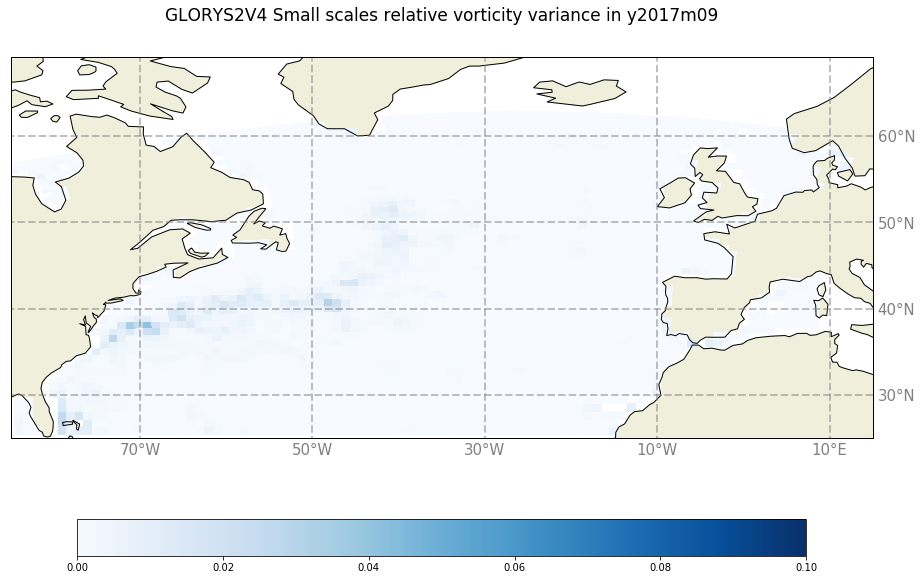

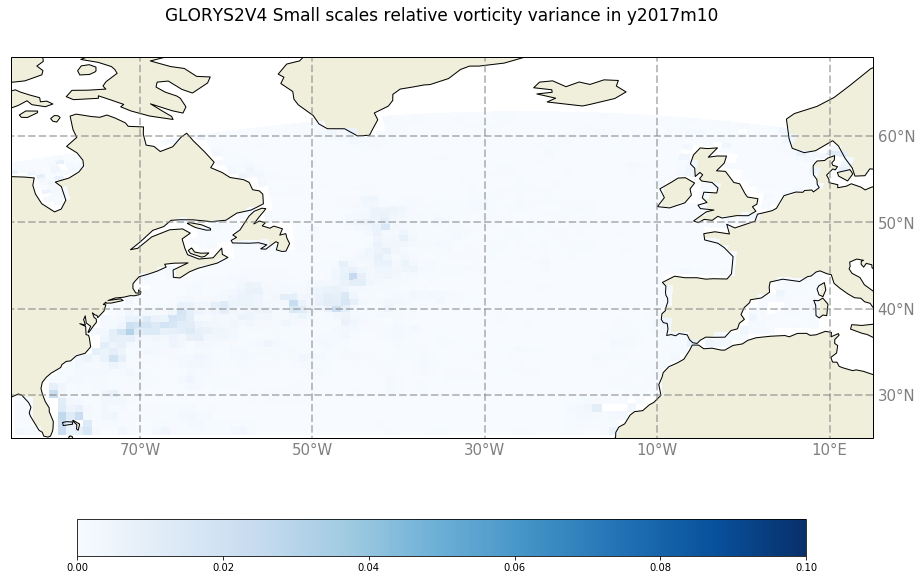

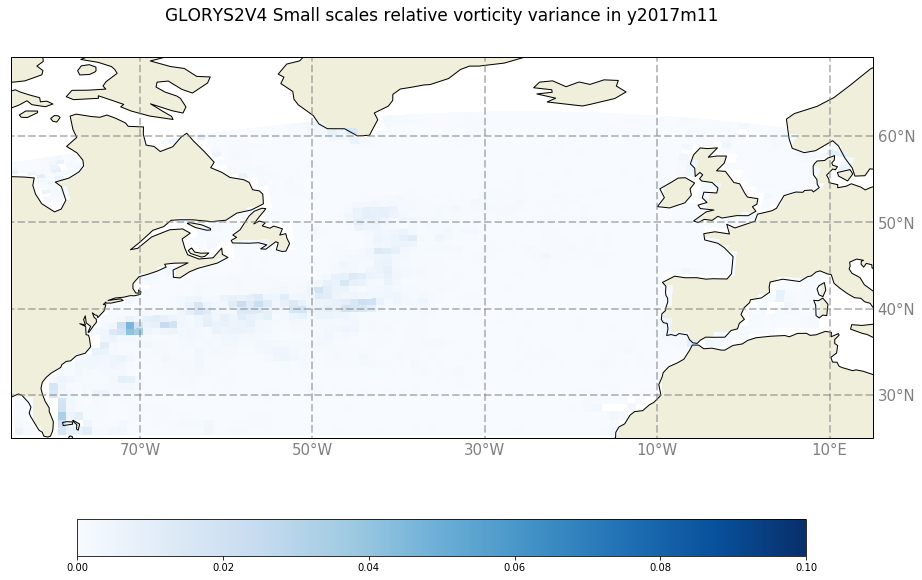

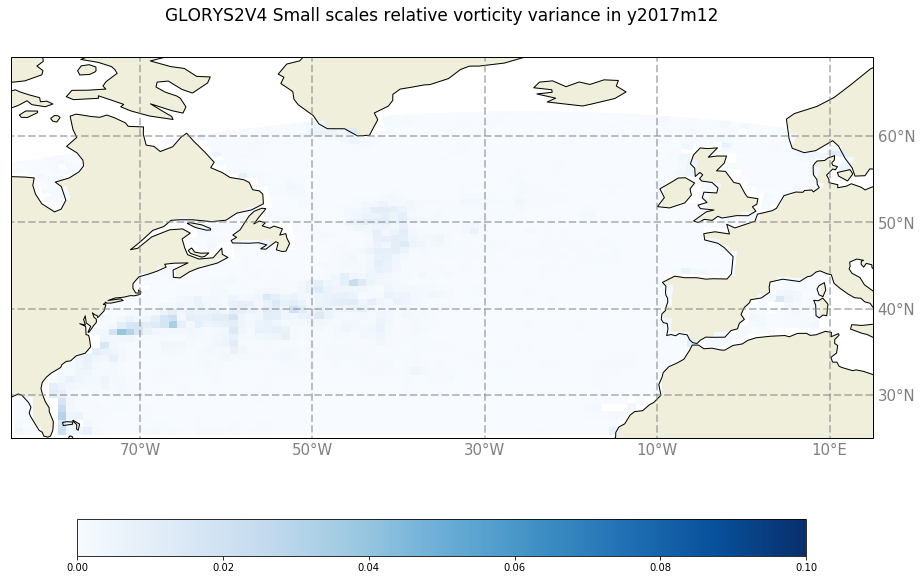

In [19]:
for m in np.arange(1,13):
    plot_var(m)

In [20]:
convert -delay 120 -loop 0 plots/GLORYS2V4_plots_small_scale_vorticity_variance_y2017m*.png plots/GLORYS2V4_plots_small_scale_vorticity_variance_y2017.gif

/bin/sh: convert: command not found


In [21]:
montage plots/NATL60_plots_small_scale_vorticity_variance_y2013m03.png plots/NATL60_plots_small_scale_vorticity_variance_y2013m09.png  plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017m03.png plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017m09.png plots/GLORYS12V1_plots_small_scale_vorticity_variance_y2017m03.png plots/GLORYS2V4_plots_small_scale_vorticity_variance_y2017m09.png -geometry 2048x1024 -tile 2x3 -quality 100 fine_scale_vorticity_variance_NATL60-GLORYS12V1-GLORYS2V4.png

convert fine_scale_vorticity_variance_NATL60-GLORYS12V1-GLORYS2V4.png -trim -bordercolor White -border 20x10 +repage fine_scale_vorticity_variance_NATL60-GLORYS12V1-GLORYS2V4.png






SyntaxError: invalid syntax (<ipython-input-21-6f4d88623932>, line 1)